In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image,ImageFilter
import warnings
import scipy.optimize as opt


%matplotlib inline
warnings.filterwarnings('ignore')

font = {'family' : 'Ubuntu',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

In [2]:
def ListofFiles(path):
    filelist=[]
    for root, dirs, files in os.walk(path):
        for file in files:
             filelist.append(os.path.join(root,file))
    return filelist

def getImageValues(Files,EventLimit=1):
    if(type(Files) is list):
        values={}
        count=0
        for file in Files:
            img1=Image.open(file)
            imgArray=np.array(img1)
            values[count]=imgArray
            count+=1
            if(EventLimit==count):
                break
        print(f" {count} frames in dictinary ")
    else:
        img1=Image.open(Files)
        values=np.array(img1)
    return values

def PickleITDump(data,fileName):
    with open(fileName,'wb') as f:
        pickle.dump(data,f)
        
def PickleITRead(fileName):
    with open(fileName,'rb') as f:
        data=pickle.load(f)
    return data

def TwoDGaussian(xy,Amp,x0,sigmax,y0,sigmay):
    x,y=xy
    value=Amp*np.exp(-((x-x0)**2/(2*sigmax**2)+(y-y0)**2/(2*sigmay**2)))
    return value
    

def TwoDGaussianElliptical(xy,Amp,x0,sigmax,y0,sigmay,theta,Shift):
    x,y=xy
    a=np.cos(theta)**2/(2*sigmax**2)+np.sin(theta)**2/(2*sigmay)
    b=-np.sin(2*theta)**2/(4*sigmax**2)+np.sin(2*theta)**2/(4*sigmay)
    c=np.cos(theta)**2/(2*sigmay**2)+np.sin(theta)**2/(2*sigmax)

    value=Shift+Amp*np.exp(-(a*(x-x0)**2+2*b*(x-x0)*(y-y0)+c*(y-y0)**2))
    return value

def TwoDGaussianEllipticalFlat(xy,Amp,x0,sigmax,y0,sigmay,theta,Shift):
    x,y=xy
    a=np.cos(theta)**2/(2*sigmax**2)+np.sin(theta)**2/(2*sigmay)
    b=-np.sin(2*theta)**2/(4*sigmax**2)+np.sin(2*theta)**2/(4*sigmay)
    c=np.cos(theta)**2/(2*sigmay**2)+np.sin(theta)**2/(2*sigmax)

    value=Shift+Amp*np.exp(-(a*(x-x0)**2+2*b*(x-x0)*(y-y0)+c*(y-y0)**2))
    return value.ravel()
        
def gaussian1d(mu,sigma,bins):
    return 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2))

def ImageLayout(XPixel,YPixel,radius,centerX,centerY):
    xx,yy=np.meshgrid(XPixel,YPixel)
    rr=np.sqrt((xx-centerX)**2+(yy-centerY)*2)
    

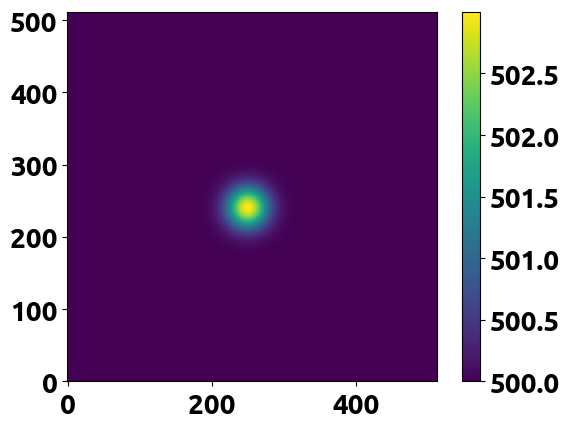

In [3]:
x = np.linspace(0, 512, 512)
xx, yy = np.meshgrid(x, x)

#create data
data = TwoDGaussianEllipticalFlat( (xx, yy),3, 250, 20, 240, 20, 0, 500)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(data.reshape(512,512),interpolation='nearest',origin='lower')
plt.colorbar()

In [4]:
Particles=PickleITRead("/home/ilker/Downloads/imgs.p")

Text(0, 0.5, 'Pixel Y')

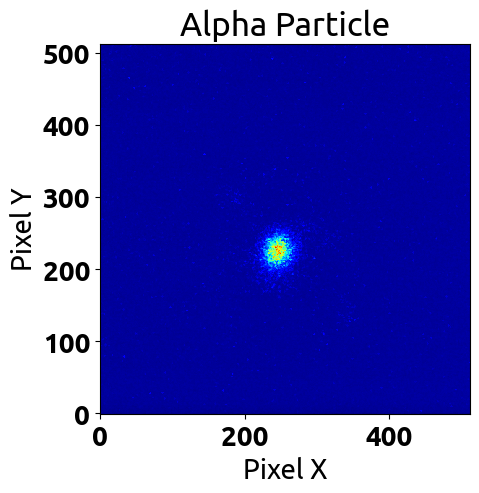

In [5]:
plt.title("Alpha Particle")
plt.imshow(Particles["Alphas"][2],cmap=plt.get_cmap('jet'),origin="lower", interpolation='nearest')
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")

In [6]:
initial_guess = np.mean(Particles["Alphas"][2]), 250, 10, 240, 10, 0, 0
flattened=Particles["Alphas"][2].ravel()
popt, pcov = opt.curve_fit(TwoDGaussianEllipticalFlat, (xx, yy),flattened , p0=initial_guess)


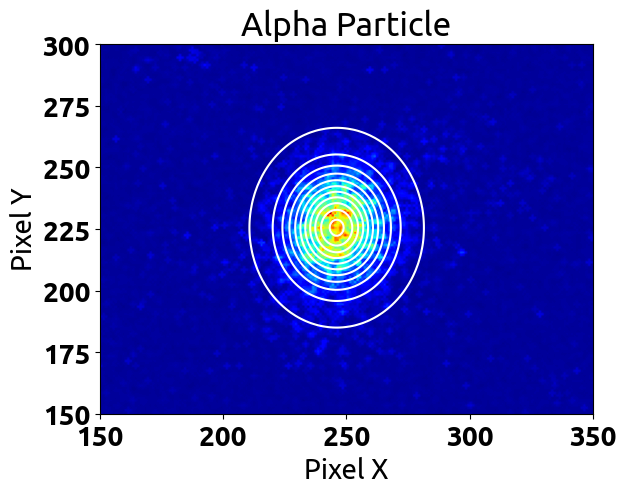

[ 8.36581689e+03  2.46058191e+02  1.24323751e+01  2.25524519e+02
  1.42328446e+01 -8.84085011e+05  1.02545652e+04]


In [7]:
data_fitted = TwoDGaussianEllipticalFlat((xx, yy), *popt)

fig, ax = plt.subplots(1, 1)
plt.title("Alpha Particle")
#ax.hold(True) For older versions. This has now been deprecated and later removed
ax.imshow(flattened.reshape(512, 512), cmap=plt.cm.jet, origin='lower',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()))
ax.contour(xx, yy, data_fitted.reshape(512, 512), 10, colors='w')
plt.xlim(150,350)
plt.ylim(150,300)
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")

plt.show()


print(popt)

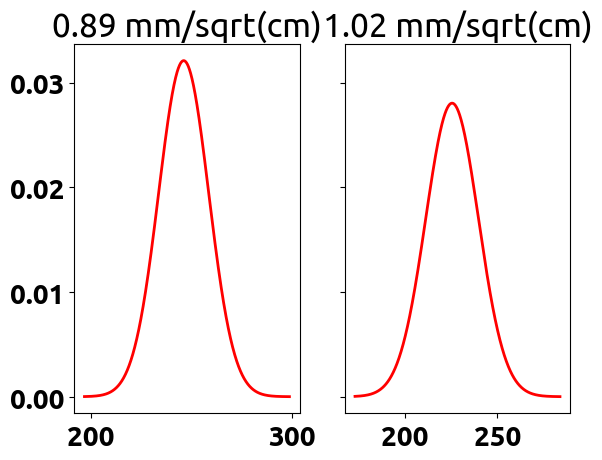

In [8]:
distance=5
pixelSize=16e-3 #mm
Magnefication=10

dx=np.random.normal(popt[1],popt[2],10000)
dy=np.random.normal(popt[3],popt[4],10000)

fig, ax = plt.subplots(1, 2,sharey=True)

count, bins = np.histogram(dx, 1000, density=True)
title= str(round((popt[2]/np.sqrt(distance))*pixelSize*Magnefication,2))+ " mm/sqrt(cm)"
ax[0].set_title(title)
ax[0].plot(bins, gaussian1d(popt[1],popt[2],bins) ,
         linewidth=2, color='r')
count, bins = np.histogram(dy, 1000, density=True)
title= str(round((popt[4]/np.sqrt(distance))*pixelSize*Magnefication,2))+ " mm/sqrt(cm)"

ax[1].set_title(title)

ax[1].plot(bins, gaussian1d(popt[3],popt[4],bins) ,
         linewidth=2, color='r')

In [49]:
##### 3 Source in a picture

Images=getImageValues(ListofFiles("/media/ilker/DATA/CRAB/15_7_8/1s/"),-1)

 201 frames in dictinary 


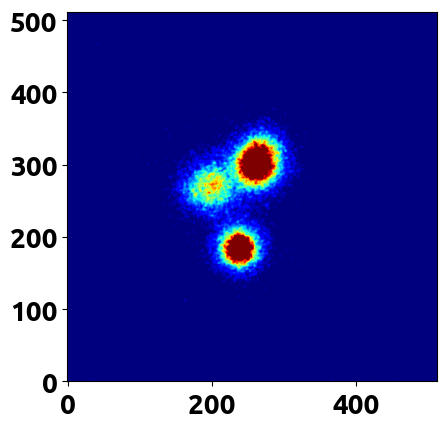

In [57]:
theImage=Images[150]
plt.imshow(theImage,cmap=plt.cm.jet,vmin=np.mean(theImage),vmax=np.max(theImage),origin='lower')

[27481 27481 27481 27509 27529 27402 27307 27254 27362 27444 27479 27423
 27318 27322 27315 27316 27311 27335 27336 27311 27328 27379 27445 27428
 27408 27515 28122 28136 28002 27450 27524 27574 27659 27584 27536 27790
 28906 28000 27808 27327 27435 27458 27549 27492 27437 27328 27330 27411
 27480 27528 27424 27419 27481 27645 27701 27415 27242 27152 27161 27415
 27516 27554 27435 27370 27250 27330 27259 27334 27312 27259 27260 27449
 27650 27683 27488 27326 27353 27594 28143 27902 27958 27723 27589 27440
 27438 27429 27522 27593 27571 27466 27276 27251 27416 27451 27397 27245
 27201 27233 27261 27245 27194 27228 27337 27400 27509 27573 27507 27448
 27434 27295 27227 27215 27315 27364 27429 27382 27324 27307 27272 27342
 27343 27468 27429 27418 27320 27258 27195 27263 27290 27273 27271 27340
 27401 27413 27438 27348 27290 27297 27350 27331 27373 27353 27465 27606
 27478 27444 27516 27477 27461 27427 27323 27446 28102 28750 29263 28575
 27969 27364 27509 27490 27360 27237 27303 27428 27

In [54]:
initial_guess = np.mean(theImage[300][200]), 300, 10, 200, 10, 0, 0
flattened=theImage.ravel()
popt, pcov = opt.curve_fit(TwoDGaussianEllipticalFlat, (xx, yy),flattened , p0=initial_guess)

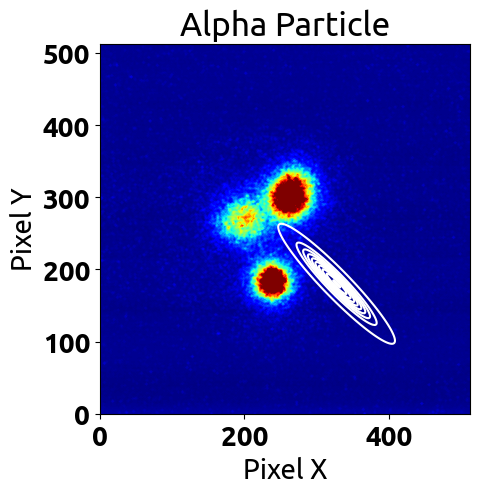

[-1.85383683e+03  3.27739869e+02  4.17207219e+01  1.80112312e+02
  3.93155623e+01 -1.11533627e+05  2.82202621e+04]


In [55]:
data_fitted = TwoDGaussianEllipticalFlat((xx, yy), *popt)

fig, ax = plt.subplots(1, 1)
plt.title("Alpha Particle")
#ax.hold(True) For older versions. This has now been deprecated and later removed
ax.imshow(flattened.reshape(512, 512), cmap=plt.cm.jet, origin='lower',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()))
ax.contour(xx, yy, data_fitted.reshape(512, 512), 10, colors='w')

plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")

plt.show()


print(popt)

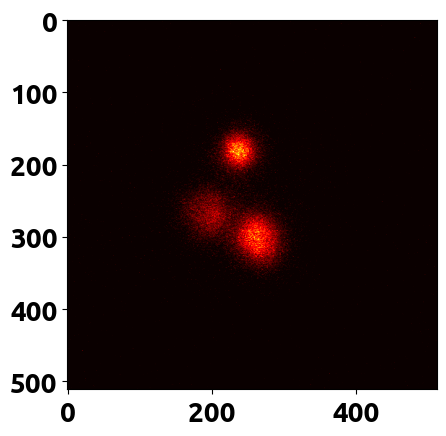